Import libraries. In particular, `scipy.stats` is the python statistics package that have many useful probability models.

In [0]:
from scipy import stats
import numpy as np

Create a list of `m` coins with probabilities of head specified in `p_list`.

In [0]:
m = 2
#p_list = stats.uniform.rvs(size=m)
p_list = np.array([0.5,0.5])
#p_list = np.ones(m) * 0.5

Create the list of sample sizes going from $1$ to `N`.

In [0]:
N = 5000
n_list = np.arange(1,N+1)

For each coin $i$, obtain `k` estimates $\hat{p}_i$ for each sample size. 

In [0]:
k = 20
phat_list = np.array([[stats.binom.rvs(n,p,size=k)/n for n in n_list] for p in p_list])
phat_list.shape

(2, 5000, 20)

Import the libraries for plotting the figure.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
# set figure size
plt.rcParams["figure.figsize"] = (15,12)
# produce vector inline graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

(Optional) To use LaTeX to compile math labels, run the following to install LaTeX on the VM. This may take a minute.

In [0]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
plt.rcParams['text.usetex'] = True

Create the desired plot.

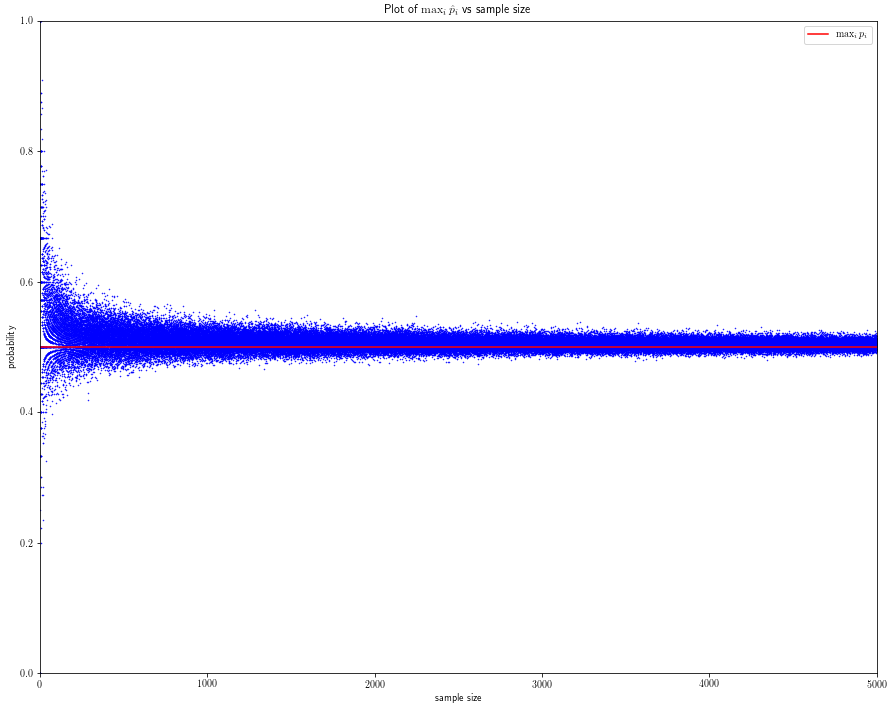

In [0]:
# plot the maximum of the probability estimates of each coin
for i in range(phat_list.shape[2]):
  plt.plot(n_list,phat_list.max(axis=0)[:,i],
          linestyle='',marker='.',color='blue',markersize=1)
# plot the maximum of true probabilities of head
plt.axhline(p_list.max(),color='red',label=r'$\max_i p_i$')
plt.ylim([0,1])
plt.xlim([0,len(n_list)])
plt.title(r'Plot of $\max_i\hat{p}_i$ vs sample size')
plt.xlabel('sample size')
plt.ylabel('probability')
plt.legend()
plt.show()

Is $\max_i \hat{p}_i$ a good estimate of the winning probability? 

___
**Answer:**

___

Optional challenge: Give a better estimate of the winning probability and compute the exact probability using Python. (Email me or share your notebook on the [Canvas discussion](https://canvas.cityu.edu.hk/courses/32828/discussion_topics/226847) page.)

*Hint: To compute the exact winning probability, see [order statistics](https://en.wikipedia.org/wiki/Order_statistic#Cumulative_distribution_function_of_order_statistics) and [expectation](https://en.wikipedia.org/wiki/Expected_value#Finite_and_countably_infinite_case).*